In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [3]:
x, x.shape

(array([[-0.02137124,  0.40618608],
        [ 0.97670045, -0.45832306],
        [ 0.90405882, -0.37651952],
        ...,
        [ 1.66258462, -0.3079193 ],
        [-0.94355873,  0.3278936 ],
        [ 0.79419406,  0.60777171]]),
 (1000, 2))

In [5]:
y[:5], y.shape

(array([1, 1, 1, 1, 0]), (1000,))

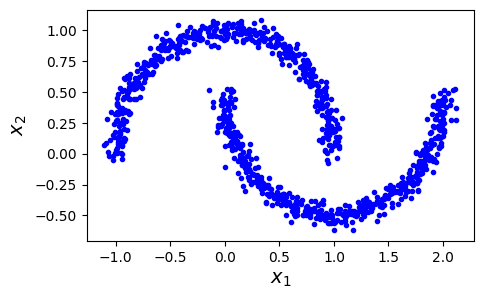

In [6]:
plt.figure(figsize=(5, 3))
plt.plot(x[:, 0], x[:, 1], 'b.')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.show()

# DBSCAN()

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.07, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.07)

In [8]:
dbscan.labels_[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [9]:
len(dbscan.core_sample_indices_)

935

In [10]:
dbscan.core_sample_indices_[:10]

array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [-0.84192557,  0.53058695]])

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dbscan(dbscan, x):
    # Identify anomalies (noise points)
    is_anomaly = dbscan.labels_ == -1
    anom = x[is_anomaly]
    
    # Non-anomalous points
    non_anom = ~is_anomaly
    normal_points = x[non_anom]
    
    # Plot non-anomalous points
    plt.scatter(normal_points[:, 0], normal_points[:, 1], 
                c=dbscan.labels_[non_anom], 
                marker='*', s=20)
    
    # Plot anomalies
    plt.scatter(anom[:, 0], anom[:, 1], 
                marker='x', s=20, c='r')
    
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.show()

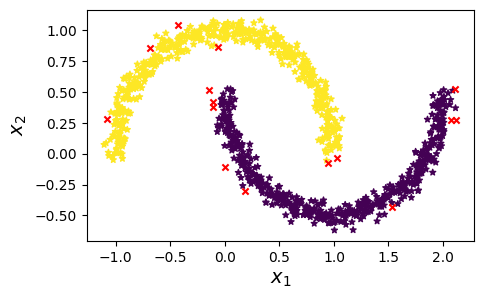

In [33]:
plt.figure(figsize=(5, 3))
plot_dbscan(dbscan, x)
plt.show()

## Predict (SVC)

In [25]:
x_core = dbscan.components_
y_core = dbscan.labels_[dbscan.core_sample_indices_]

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_svc', SVC(kernel='poly', degree=3, coef0=1, C=10))
])

svm_clf.fit(x_core, y_core)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svc', SVC(C=10, coef0=1, kernel='poly'))])

In [27]:
x_new = np.array([[-0.5, 1], [1, 0.5], [0, -0.1], [2, 1]])
svm_clf.predict(x_new)

array([1, 1, 0, 1])

In [34]:
def plot_discion_boundary(clf, x, y):
    xmin = x.min(axis=0)
    xmax = x.max(axis=0)

    x1s = np.linspace(xmin[0]-0.2, xmax[0]+0.2, 500)
    x2s = np.linspace(xmin[1]-0.2, xmax[1]+0.2, 500)
    x1, x2 = np.meshgrid(x1s, x2s)

    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3)
    plt.contour(x1, x2, y_pred)

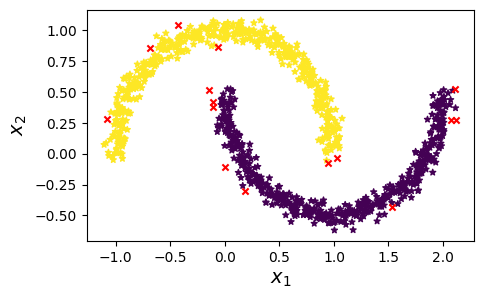

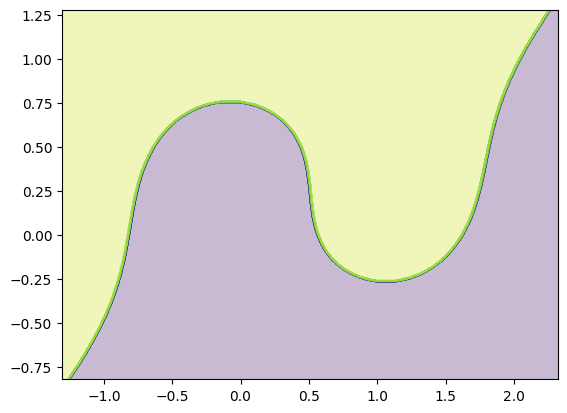

In [44]:
plt.figure(figsize=(5, 3))
plot_dbscan(dbscan, x)
plot_discion_boundary(svm_clf, x, y)
plt.show()